<a href="https://colab.research.google.com/github/agrawalsourabh/DeepLearning/blob/master/MNIST_Fashion_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Fashion Dataset </br>

**Learning Objective**

* Load Fashion Dataset
* Create a Convolution Layer
* Configure Neural Network
* Evaluate model

In [0]:
# importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

**Load Fashion Data**

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

**Examine the data**


In [96]:
print("Training data - features", x_train.shape)
print("Training data - target", y_train.shape)

print("Testing data - features", x_test.shape)
print("Testing data - target", y_test.shape)

Training data - features (60000, 28, 28)
Training data - target (60000,)
Testing data - features (10000, 28, 28)
Testing data - target (10000,)


**Examine the target data**

In [97]:
print("Labels: ", np.unique(y_train))

Labels:  [0 1 2 3 4 5 6 7 8 9]


**Visualise data**

5


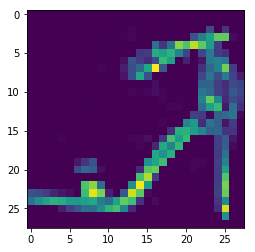

In [98]:
plt.imshow(x_train[8])
print(y_train[8])

**Normalise the training and testing data**

In [0]:
x_train_mod = x_train/255
x_test_mod = x_test/255

x_train_mod = x_train.reshape(60000, 28, 28, 1)
x_test_mod = x_test.reshape(10000, 28, 28, 1)

y_train_mod = y_train
y_test_mod = y_test

**Callbacks**

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.1):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

**Built Convolution Layer Network**

* Conv Layer 1
* Max Pool
* Con Layer 2
* Max Pool
* Flatten
* Fully connected layer
* Output layer

In [0]:
# Create a Sequential
model = tf.keras.models.Sequential()

# Create a Conv 1st layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(28, 28, 1)))

# Add pooling layer - MaxPool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# Add 2nd Conv Layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu))

# Add pooling layer - MaxPool
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


# Flatten 
model.add(tf.keras.layers.Flatten())

# Add fully connected layer - 1
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Add output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

**Built the model - Compile and Fit**

In [116]:
model.compile(optimizer='Adam', loss="sparse_categorical_crossentropy")
model.fit(x=x_train_mod, y=y_train_mod, epochs=5, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 187us/sample - loss: 0.5736
Epoch 2/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.3497
Epoch 3/5
60000/60000 [==============================] - 11s 178us/sample - loss: 0.3016
Epoch 4/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2767
Epoch 5/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2563


**Evaluate the model**

In [117]:
model.evaluate(x_test_mod, y_test)

10000/10000 [==============================] - 1s 107us/sample - loss: 0.3483


0.3483122186422348

**Predict**

In [0]:
y_pred = model.predict(x_test_mod)

In [108]:
print(y_pred[22])

[4.0250904e-07 8.1238301e-07 8.3201734e-08 2.1982495e-07 1.1268769e-06
 1.8998176e-03 3.6855764e-07 9.9795604e-01 3.6002006e-05 1.0514231e-04]


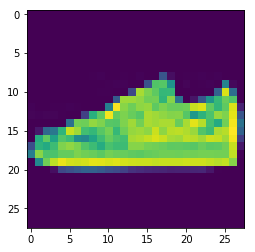

In [109]:
plt.imshow(x_test[22])

In [113]:
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


**Visualising the results**

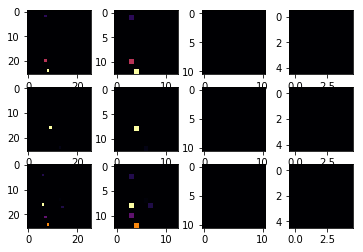

In [114]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test_mod[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test_mod[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test_mod[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)